A random collection of information  ...

In [3]:
import netgen.gui
from netgen.geom2d import unit_square
from ngsolve import *

There is a class Mesh in Netgen, and a class Mesh in NGSolve:
* Netgen: geometry, mesh generation
* NGSolve: finite elements, linear algebra

In [4]:
ngmesh = unit_square.GenerateMesh(maxh=0.3)
mesh = Mesh(ngmesh)
type(ngmesh), type(mesh)

(netgen.libngpy._meshing.Mesh, ngsolve.comp.Mesh)

## Geometric modeling in 2D:

A geometry consists of lines:

In [5]:
from netgen.geom2d import SplineGeometry
geometry = SplineGeometry()

pnts = [ (0,0), (2,0), (1,1), (0,1) ]
pnums = [geometry.AddPoint(*p) for p in pnts]
print ("point numbers: ", pnums)

lines = [(0,1), (1,2), (2,3), (3,0)]
for l in lines:
    geometry.AddSegment(["line", pnums[l[0]], pnums[l[1]]])
    
mesh = Mesh(geometry.GenerateMesh(maxh=0.2))
Draw (mesh)

point numbers:  [0, 1, 2, 3]


or quadratic rational splines: 

In [49]:
from netgen.geom2d import SplineGeometry
geometry = SplineGeometry()

pnts = [ (0,0), (2,0), (2,1), (1,1), (0,1) ]
pnums = [geometry.AddPoint(*p) for p in pnts]

geometry.AddSegment(["line", 0, 1])
geometry.AddSegment(["spline3", 1, 2, 3])
geometry.AddSegment(["line", 3, 4])
geometry.AddSegment(["line", 4, 0])

mesh = Mesh(geometry.GenerateMesh(maxh=0.2))
Draw (mesh)

Multiple sub-domains:

In [7]:
from netgen.geom2d import SplineGeometry
geometry = SplineGeometry()

pnts = [ (0,0), (1,0), (2,0), (2,1), (1,1), (0,1) ]
pnums = [geometry.AddPoint(*p) for p in pnts]

geometry.AddSegment(["line", 0, 1], leftdomain=1, rightdomain=0, bc="bot")
geometry.AddSegment(["line", 1, 2], leftdomain=2, rightdomain=0, bc="bot")
geometry.AddSegment(["line", 2, 3], leftdomain=2, rightdomain=0, bc="right")
geometry.AddSegment(["line", 3, 4], leftdomain=2, rightdomain=0)
geometry.AddSegment(["line", 4, 5], leftdomain=1, rightdomain=0)
geometry.AddSegment(["line", 5, 0], leftdomain=1, rightdomain=0)
geometry.AddSegment(["line", 1, 4], leftdomain=1, rightdomain=2, bc="inner")

geometry.SetMaterial(1, "Omega1")
geometry.SetMaterial(2, "Omega2")

mesh = Mesh (geometry.GenerateMesh(maxh=0.2))
Draw (mesh)

In [8]:
print ("material names: ", mesh.GetMaterials())
print ("boundary condition names:", mesh.GetBoundaries())

material names:  ('Omega1', 'Omega2')
boundary condition names: ('bot', 'bot', 'right', 'default', 'default', 'default', 'inner')


## CoefficientFunctions
are functions which are defined on a mesh

In [9]:
func = y*sin(10*x)
print (func)

coef binary operation '*', real
  coef coordinate y, real
  coef unary operation 'sin', real
    coef N5ngfem24ScaleCoefficientFunctionE, real
      coef coordinate x, real



In [10]:
Draw (func, mesh, "firstfunc")

Functions defined on sub-domains: use a list

In [11]:
pwfunc = CoefficientFunction([0, func])
Draw (pwfunc, mesh, "pwfunc")

In [12]:
simplefunc = x*y
print ("integral = ", Integrate(simplefunc, mesh))

integral =  0.9999999999999956


In [13]:
print ("int_Om1 = ", Integrate(simplefunc, mesh, definedon=mesh.Materials("Omega1")))
print ("int_Om2 = ", Integrate(simplefunc, mesh, definedon=mesh.Materials("Omega2")))
print ("int_gamma_r = ", Integrate(simplefunc, mesh, definedon=mesh.Boundaries("right")))

int_Om1 =  0.24999999999999903
int_Om2 =  0.7499999999999969
int_gamma_r =  0.999999999999997


## Interpolating functions to GridFunctions:

In [48]:
fes = H1(mesh, order=5)
gfu = GridFunction(fes)
func = sin(20*x)*y
gfu.Set (func)
Draw (gfu)

## Evaluating in points:
To evaluate a function (GridFunction or CoefficientFunction) in an arbitrary point within the mesh, we first have to search for the element containing the point. This is done by mesh(x,y):

In [45]:
mp = mesh(0.2, 0.2)
print ("type(mp) =", type(mp))
print ("element number:", mp.nr)

print ("gfu(mp) =", gfu(mp))
print ("func(mp) = ", func(mp))

type(mp) = <class 'ngsolve.fem.MeshPoint'>
element number: 29
gfu(mp) = -0.15134048437919856
func(mp) =  -0.15136049906158558


In [46]:
xi = [0.01 * i for i in range(200)]
vals = [gfu(mesh(x,0.9)) for x in xi]

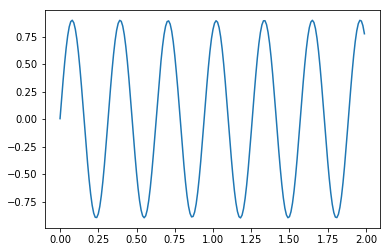

In [47]:
import matplotlib.pyplot as plt
plt.plot (xi, vals)